# License Plate Detection - Data Collection and Exploration

### Imports

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import matplotlib

from matplotlib import pyplot as plt
from PIL import Image

### Env setup

In [2]:
# This is needed to display the images.
%matplotlib inline

os.chdir(os.path.join(os.getcwd(), 'tf_object_detection'))
working_dir = os.getcwd()

In [3]:
# ****************** don't edit ******************

PATH_TO_LABELS = '../config/plate_detection/labels_map.pbtxt'

IMAGE_DIR = '../data/plate_detection/images/ger'
ANNOTATIONS_DIR = '../data/plate_detection/annotations'
OUTPUT_DIR = '../data/plate_detection'
LABELS_CSV = OUTPUT_DIR + '/labels.csv'

### Collect Data

In [4]:
def show_images(images, labels, figsize=(15, 5)):
    cols = 4
    rows = len(images) // cols

    image_index = 0
    fig, axarr = plt.subplots(rows, cols, figsize=figsize)
    for r in range(rows):
        for c in range(cols):
            image = images[image_index]
            axarr[r, c].axis("off")
            axarr[r, c].title.set_text(labels[image_index])
            axarr[r, c].imshow(image, cmap='gray')
            image_index += 1

    plt.show()

In [5]:
import glob
import matplotlib.image as mpimg

IMAGE_PATHS = []
IMAGE_NAMES = []
for filename in glob.glob(os.path.join(IMAGE_DIR, '*.jpg')):
    IMAGE_PATHS.append(mpimg.imread(filename))
    IMAGE_NAMES.append(filename.split('/')[-1])
    
print ('{} test images found in {}'.format(len(IMAGE_PATHS), IMAGE_DIR))

211 test images found in ../data/plate_detection/images/ger


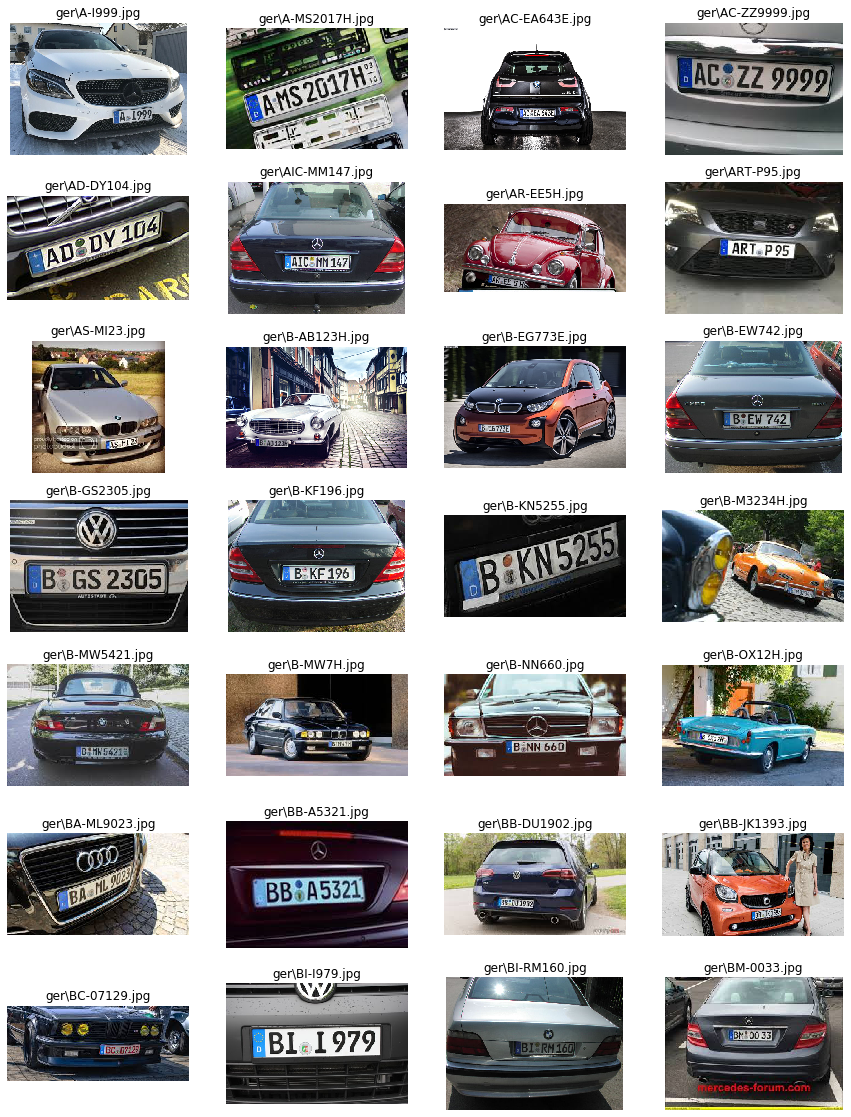

In [6]:
show_images(IMAGE_PATHS[:30], IMAGE_NAMES[:30], figsize=(15, 20))

### Create TF-Record dataset

In [8]:
!python utils/xml_to_csv.py -i {ANNOTATIONS_DIR} -o {LABELS_CSV}

Successfully converted xml to csv.


In [12]:
TRAIN_SIZE = 0.8 # use 80% of data as training data and the remaining 20% as evaluation data

!python utils/generate_tfrecord.py --train_size={TRAIN_SIZE} --csv_input={LABELS_CSV} --output_path={OUTPUT_DIR} --img_path={IMAGE_DIR}

211 images found
169 images stored in TFRecords: ../data/plate_detection\train.record
42 images stored in TFRecords: ../data/plate_detection\eval.record


2020-03-17 11:24:50.429396: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll


W0317 11:24:51.760797  3988 module_wrapper.py:139] From utils/generate_tfrecord.py:94: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0317 11:24:51.795765  3988 module_wrapper.py:139] From utils/generate_tfrecord.py:52: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

